In [18]:
#import urllib.request
import matplotlib.pyplot as plt
import os
import pandas as pd
import geopandas as gpd
#import zipfile

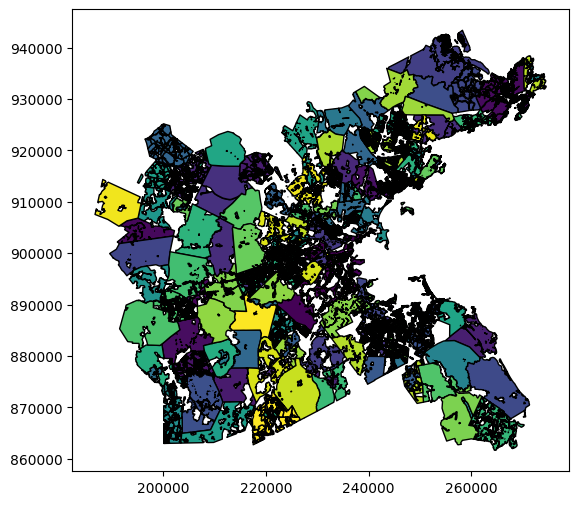

In [19]:

working_dir = "/Users/evan/MIT/c85/FP1/school datasets/Single family zoning vs other housing zoning/"
os.chdir(working_dir)

# Load GeoJSON file
gdf = gpd.read_file("housing_sf_other_w_census.geojson")

# Plot
gdf.plot(figsize=(10, 6), edgecolor="black", cmap="viridis")

# Show plot
plt.show()


In [20]:

print(gdf.keys())

Index(['fid', 'muni_id', 'muni', 'is_housing', 'only_single_family',
       '%_single_family', 'is_MBTA_community', 'pop', 'male', 'female',
       'pop_u18', 'pop_18_64', 'pop_65o', 'nhwhi', 'nhaa', 'nhna', 'nhas',
       'nhpi', 'nhoth', 'nhmlt', 'lat', 'fhh', 'fhh2', 'fhh3', 'fhh4', 'fhh5',
       'fhh6', 'fhh7o', 'nfhh', 'nfhh1', 'nfhh2', 'nfhh3', 'nfhh4', 'nfhh5',
       'nfhh6', 'nfhh7o', 'hh', 'incu10', 'inc1015', 'inc1520', 'inc2025',
       'inc2530', 'inc3035', 'inc3540', 'inc4045', 'inc4550', 'inc5060',
       'inc6075', 'i7599', 'i100125', 'i125150', 'i150200', 'in200o',
       'geometry'],
      dtype='object')


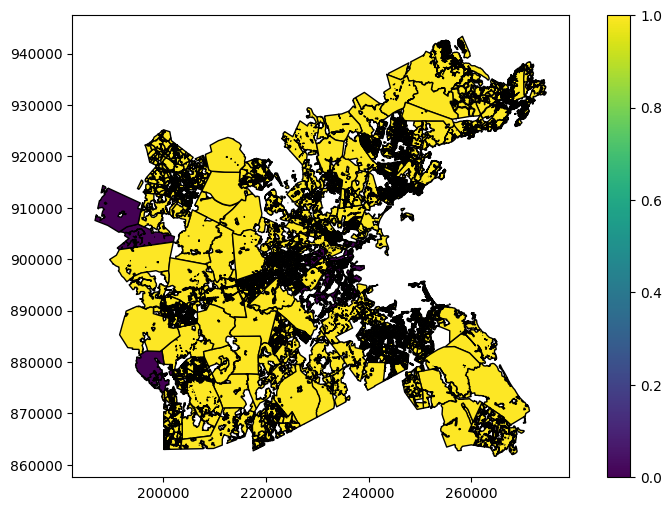

In [21]:
column_to_plot = "is_MBTA_community"


# Plot the GeoDataFrame with the selected column
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(column=column_to_plot, cmap="viridis", legend=True, edgecolor="black", ax=ax)

# Show plot
plt.show()

In [22]:
print(gdf.columns)

Index(['fid', 'muni_id', 'muni', 'is_housing', 'only_single_family',
       '%_single_family', 'is_MBTA_community', 'pop', 'male', 'female',
       'pop_u18', 'pop_18_64', 'pop_65o', 'nhwhi', 'nhaa', 'nhna', 'nhas',
       'nhpi', 'nhoth', 'nhmlt', 'lat', 'fhh', 'fhh2', 'fhh3', 'fhh4', 'fhh5',
       'fhh6', 'fhh7o', 'nfhh', 'nfhh1', 'nfhh2', 'nfhh3', 'nfhh4', 'nfhh5',
       'nfhh6', 'nfhh7o', 'hh', 'incu10', 'inc1015', 'inc1520', 'inc2025',
       'inc2530', 'inc3035', 'inc3540', 'inc4045', 'inc4550', 'inc5060',
       'inc6075', 'i7599', 'i100125', 'i125150', 'i150200', 'in200o',
       'geometry'],
      dtype='object')


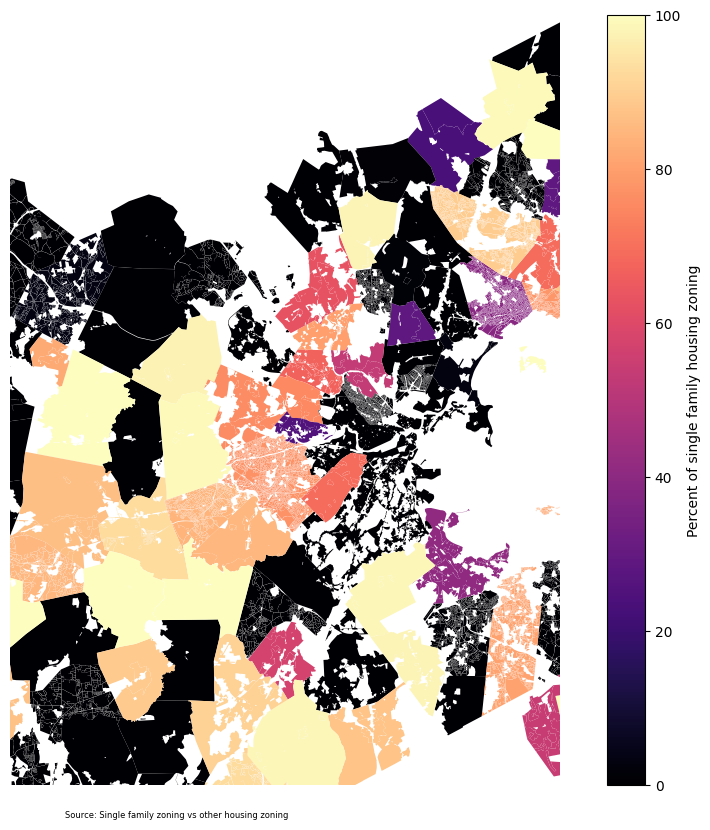

In [23]:
#import geopandas as gpd
#import matplotlib.pyplot as plt

# Load the GeoJSON file
#gdf = gpd.read_file("your_file.geojson")

# Choose a categorical column
column_to_plot = "%_single_family"

# Plot using categorical coloring
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column=column_to_plot, legend=True, ax=ax, cmap='magma',legend_kwds={"label": "Percent of single family housing zoning", "orientation": "vertical"}, missing_kwds={'color': 'lightgrey'})

plt.xlim([200000,250000])
plt.ylim([870000,940000])
ax.set_axis_off()
plt.text(205000, 867000, "Source: Single family zoning vs other housing zoning", fontsize=6)


# Show plot
plt.show()


In [24]:
center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
print(center)

[901100.9766262854, 230218.7004378982]


In [32]:
gdf["inc_under_100k"] = gdf["incu10"] + gdf["inc1015"] + gdf["inc1520"]+ gdf["inc2025"]+ gdf["inc2530"]+ gdf["inc3035"]+ gdf["inc3540"]+ gdf["inc4045"]+ gdf["inc4550"]+ gdf["inc5060"]+ gdf["inc6075"]+ gdf["i7599"]
gdf["inc_over_100k"] = gdf["i100125"] + gdf["i125150"] + gdf["i150200"]+ gdf["in200o"]

gdf["inc_under_100k_ratio"] = 100 * gdf["inc_under_100k"] / (gdf["inc_over_100k"] + gdf["inc_under_100k"])
gdf["inc_over_100k_ratio"] = 100 * gdf["inc_over_100k"] / (gdf["inc_over_100k"] + gdf["inc_under_100k"])

Text(205000, 867000, 'Source: Single family zoning vs other housing zoning')

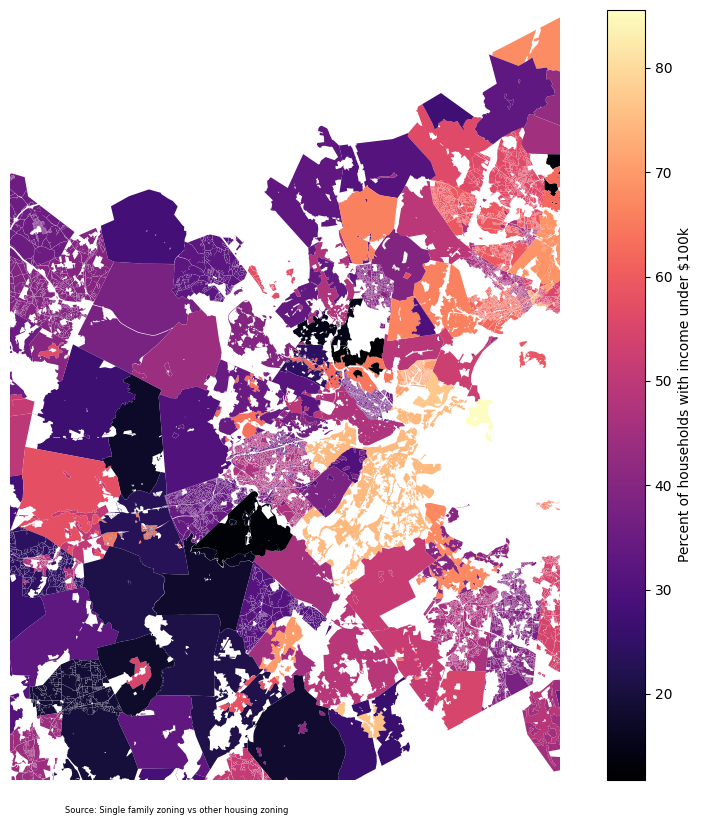

In [33]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column="inc_under_100k_ratio", legend=True, ax=ax, cmap='magma',legend_kwds={"label": "Percent of households with income under $100k", "orientation": "vertical"}, missing_kwds={'color': 'lightgrey'})

plt.xlim([200000,250000])
plt.ylim([870000,940000])
ax.set_axis_off()
plt.text(205000, 867000, "Source: Single family zoning vs other housing zoning", fontsize=6)
